## Download Data

In [1]:
## get the data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip

--2020-06-29 14:10:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260502910 (248M) [application/zip]
Saving to: ‘concrete_data_week2.zip’

concrete_data_week2 100%[===================>] 248.43M  1.11MB/s    in 2m 1s   

2020-06-29 14:12:49 (2.05 MB/s) - ‘concrete_data_week2.zip’ saved [260502910/260502910]



In [3]:
!unzip -q concrete_data_week2.zip

## Import Libraries and Packages

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
!ls ./concrete_data_week2

Negative Positive


In [6]:
os.listdir('concrete_data_week2')

['Positive', '.DS_Store', 'Negative']

## Construct an ImageDataGenerator Instance

Defined a Keras ImageDataGenerator instance and used it to load and manipulate data for building a deep learning model.

In [7]:
dataset_dir = './concrete_data_week2'

#### Standard ImageDataGenerator

In [8]:
# instantiate your image data generator

data_generator = ImageDataGenerator()

In [23]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


In [17]:
first_batch = image_generator.next()
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

In [11]:
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[172., 174., 169.],
         [176., 178., 173.],
         [181., 183., 178.],
         ...,
         [157., 159., 154.],
         [156., 158., 153.],
         [154., 156., 151.]],

        [[170., 172., 167.],
         [172., 174., 169.],
         [174., 176., 171.],
         ...,
         [155., 157., 152.],
         [154., 156., 151.],
         [153., 155., 150.]],

        [[169., 171., 166.],
         [167., 169., 164.],
         [166., 168., 163.],
         ...,
         [152., 154., 149.],
         [152., 154., 149.],
         [151., 153., 148.]],

        ...,

        [[153., 154., 148.],
         [155., 156., 150.],
         [158., 159., 153.],
         ...,
         [143., 144., 138.],
         [144., 145., 139.],
         [145., 146., 140.]],

        [[147., 148., 142.],
         [150., 151., 145.],
         [153., 154., 148.],
         ...,
         [142., 143., 137.],
         [143., 144., 138.],
         [144., 145., 139.]],

        [[141., 142., 136.],
       

In [12]:
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

#### Custom ImageDataGenerator

In [13]:
# instantiate your image data generator
data_generator = ImageDataGenerator(
    rescale=1./255
)

In [14]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


In [15]:
first_batch = image_generator.next()
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

## Visualize Batches of Images

In [24]:
first_batch = image_generator.next()
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
second_batch = image_generator.next()
second_batch_images = second_batch[0]
second_batch_labels = second_batch[1]
third_batch = image_generator.next()
third_batch_images = third_batch[0]
third_batch_labels = third_batch[1]
fourth_batch = image_generator.next()
fourth_batch_images = fourth_batch[0]
fourth_batch_labels = fourth_batch[1]
fifth_batch = image_generator.next()
fifth_batch_images = fifth_batch[0]
fifth_batch_labels = fifth_batch[1]

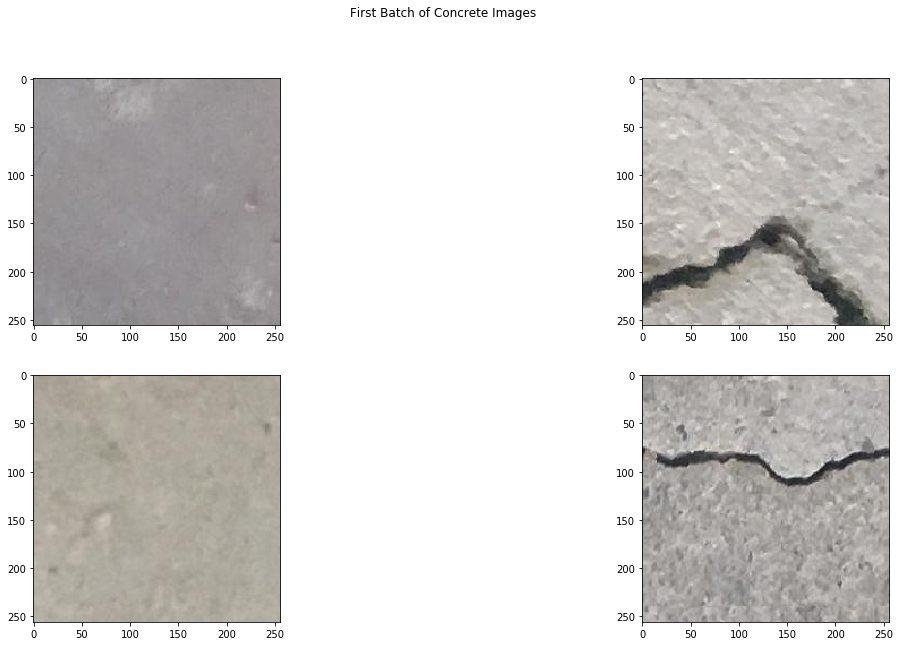

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

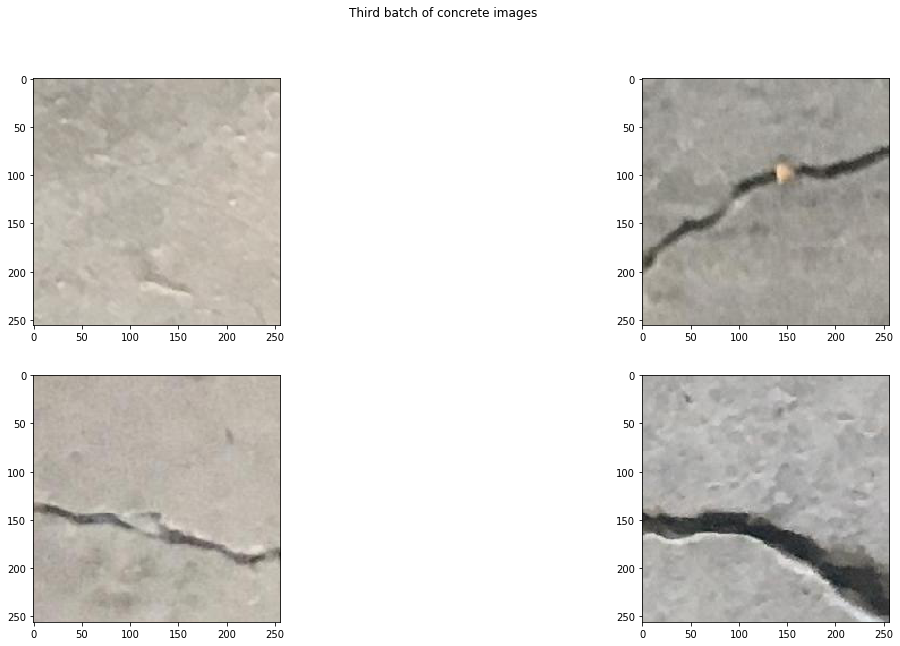

In [26]:
# a plot to visualize the images in the third batch

def visualize_batch(images, ordinal):
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

    i = 0
    for axis1 in axes:
        for axis2 in axis1:
            image_data = images[i]
            axis2.imshow(image_data)
            i += 1

    figure.suptitle("{} batch of concrete images".format(ordinal.title()))
    plt.show()


visualize_batch(third_batch_images, "third")

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


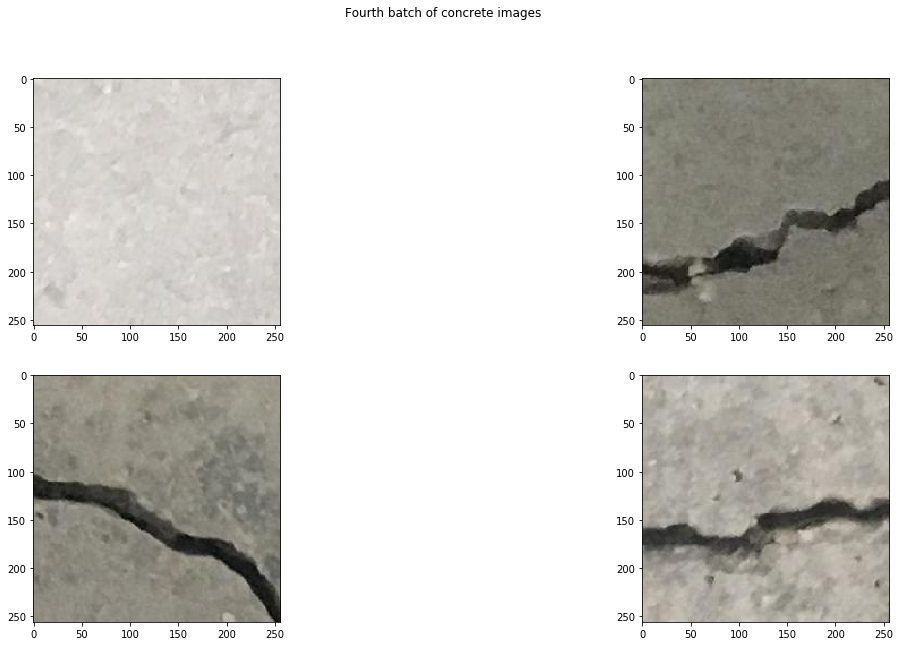

There are 1 negative image and 3 positive images.


In [30]:
# number of images from each class are in the fourth batch
print(fourth_batch_labels)
visualize_batch(fourth_batch_images, "fourth")
print("There are 1 negative image and 3 positive images.")

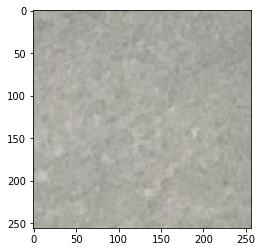

In [31]:
# a plot to visualize the second image in the fifth batch

plt.imshow(fifth_batch_images[1])

In [33]:
# number of images from each class are in the fifth batch
print(fifth_batch_labels)
print("There are 2 negative images and 2 positive images.")

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
There are 2 negative images and 2 positive images.


<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).